#### Important: Run "English_translation" notebook first

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('englishTranslationLemma.csv', index_col = 0)

df.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,translate_eng,length_translate_eng,clean_eng_text,length_clean_eng_text,Lemma_clean_eng_text
0,0,4.0,1,1,es,0,NaN,- El artículo aborda un problema contingente y...,2010-07-05,-The article addresses a very relevant and con...,536,article addresses relevant contingent problem ...,372,article address relevant contingent problem in...
1,0,4.0,1,2,es,1,NaN,El artículo presenta recomendaciones prácticas...,2010-07-05,The article presents practical recommendations...,606,article presents practical recommendations dev...,426,article present practical recommendation devel...
2,0,5.0,1,3,es,1,NaN,- El tema es muy interesante y puede ser de mu...,2010-07-05,-The theme is very interesting and can be of m...,1235,theme interesting much help guide incorporate ...,813,theme interesting much help guide incorporate ...
3,1,4.0,2,1,es,1,NaN,Se explica en forma ordenada y didáctica una e...,2010-07-05,An ICT use experience for academic collaborati...,1300,ict use experience academic collaboration expl...,908,ict use experience academic collaboration expl...
4,1,4.0,2,3,es,0,NaN,Los autores describen una metodología para des...,2010-07-05,The authors describe a methodology for develop...,1812,authors describe methodology developing collab...,1210,author describe methodology developing collabo...


In [4]:
# Extract some columns: level_0, confidence, evaluation, orientation and Lemma_clean_eng_text

df_new = df[['level_0', 'evaluation', 'orientation', 'Lemma_clean_eng_text']]

df_new.head()

,level_0,evaluation,orientation,Lemma_clean_eng_text
0,0,1,0,article address relevant contingent problem in...
1,0,1,1,article present practical recommendation devel...
2,0,1,1,theme interesting much help guide incorporate ...
3,1,2,1,ict use experience academic collaboration expl...
4,1,2,0,author describe methodology developing collabo...


### Using NLTK-Vader

In [5]:
def vader_compound(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
 
    polarity_dict = SIA.polarity_scores(text) 
     
    # Calculate compound score
    return polarity_dict['compound']

In [6]:
# # Compound

df_new["Vader_Compound"] = df_new["Lemma_clean_eng_text"].apply(lambda x :vader_compound(x))
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081
395,169,-1,-1,paper well written easy read conforms format e...,0.4767
396,170,-1,0,background observation example implementation ...,0.4588
397,170,1,-1,process making state machine arduous device pr...,-0.3612
398,171,1,-1,article basically describes component hovercra...,-0.0258


In [7]:
# Want to know what are the min and max values of the compound. 
# Knowing them can be helpful to set up my intervals in the next function
df_new["Vader_Compound"].describe()

count    399.000000
mean       0.526640
std        0.496346
min       -0.979900
25%        0.329100
50%        0.726900
75%        0.906200
max        0.996700
Name: Vader_Compound, dtype: float64

In [8]:
###  Sentiment analysis using VADER.

def vader_sentiment(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA.polarity_scores(text) 
      
    score ="" 
    # Calculate overall sentiment by compound score
    if polarity_dict['compound'] < -0.9 : 
        score = "very negative"
        
    elif polarity_dict['compound']>= -0.9 and polarity_dict['compound'] <= - 0.0000001 : 
        score = "negative" 
        
    elif polarity_dict['compound'] > 0.0000001 and polarity_dict['compound'] <= 0.9 : 
        score = "positive"
        
    elif polarity_dict['compound'] > 0.9 : 
        score = "very positive"    
  
    else : 
        score = "Neutral"
        
    return score    

In [9]:
# # Label the reviews using Vader

df_new["Vader_sentiment"] = df_new["Lemma_clean_eng_text"].apply(lambda x :vader_sentiment(x))
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081,very positive
395,169,-1,-1,paper well written easy read conforms format e...,0.4767,positive
396,170,-1,0,background observation example implementation ...,0.4588,positive
397,170,1,-1,process making state machine arduous device pr...,-0.3612,negative
398,171,1,-1,article basically describes component hovercra...,-0.0258,negative


In [10]:
###  Sentiment analysis using VADER.

def vader_sentiment_scores(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
 
    polarity_dict = SIA.polarity_scores(text) 
    score = ""  
    # Calculate overall sentiment by compound score
    if polarity_dict['compound'] < -0.9 : 
        score = "-2"
        
    elif polarity_dict['compound']>= -0.9 and polarity_dict['compound'] <= - 0.0000001 : 
        score = "-1" 
        
    elif polarity_dict['compound'] > 0.00000001 and polarity_dict['compound'] <= 0.9 : 
        score = "1"
        
    elif polarity_dict['compound'] > 0.9 : 
        score = "2"    
  
    else : 
        score = "0"
        
    return score    

In [11]:
df_new["Vader_score"] = df_new["Lemma_clean_eng_text"].apply(lambda x :vader_sentiment_scores(x))
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081,very positive,2
395,169,-1,-1,paper well written easy read conforms format e...,0.4767,positive,1
396,170,-1,0,background observation example implementation ...,0.4588,positive,1
397,170,1,-1,process making state machine arduous device pr...,-0.3612,negative,-1
398,171,1,-1,article basically describes component hovercra...,-0.0258,negative,-1


In [12]:
df_new.head()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score
0,0,1,0,article address relevant contingent problem in...,0.9657,very positive,2
1,0,1,1,article present practical recommendation devel...,0.9062,very positive,2
2,0,1,1,theme interesting much help guide incorporate ...,0.9231,very positive,2
3,1,2,1,ict use experience academic collaboration expl...,0.8920,positive,1
4,1,2,0,author describe methodology developing collabo...,0.9768,very positive,2


### Using TextBlob

In [13]:
# Calculated the polarity of each review
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df_new["TextBlob_polarity"] = df_new["Lemma_clean_eng_text"].apply(pol)
df_new["TextBlob_subjectivity"]= df_new["Lemma_clean_eng_text"].apply(sub)
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score,TextBlob_polarity,TextBlob_subjectivity
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081,very positive,2,0.092803,0.469621
395,169,-1,-1,paper well written easy read conforms format e...,0.4767,positive,1,-0.002083,0.547917
396,170,-1,0,background observation example implementation ...,0.4588,positive,1,0.112500,0.312500
397,170,1,-1,process making state machine arduous device pr...,-0.3612,negative,-1,-0.040278,0.434722
398,171,1,-1,article basically describes component hovercra...,-0.0258,negative,-1,0.070000,0.163333


In [14]:
df_new["TextBlob_subjectivity"].describe()

count    399.000000
mean       0.398320
std        0.134282
min        0.000000
25%        0.316667
50%        0.399527
75%        0.483160
max        1.000000
Name: TextBlob_subjectivity, dtype: float64

In [15]:
df_new["TextBlob_polarity"].describe() 

count    399.000000
mean       0.108784
std        0.144411
min       -0.800000
25%        0.034524
50%        0.100000
75%        0.175255
max        0.700000
Name: TextBlob_polarity, dtype: float64

In [16]:
# Based of the min(-0.80) and the max(0.70) values of the polarity I will set my intervals
def TextBlob_sentiment(text):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity < -0.6:
            return "very negative"
        elif analysis.sentiment.polarity >= -0.6 and analysis.sentiment.polarity <= -0.0000001:
            return "negative"
        elif analysis.sentiment.polarity > -0.0000001 and analysis.sentiment.polarity <= 0.6:
            return "positive" 
        elif analysis.sentiment.polarity> 0.6:
            return "very positive"
        else:
            return 'neutral'

In [17]:
# # Label the reviews using Vader

df_new["TextBlob_sentiment"] = df_new["Lemma_clean_eng_text"].apply(lambda x :TextBlob_sentiment(x))
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score,TextBlob_polarity,TextBlob_subjectivity,TextBlob_sentiment
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081,very positive,2,0.092803,0.469621,positive
395,169,-1,-1,paper well written easy read conforms format e...,0.4767,positive,1,-0.002083,0.547917,negative
396,170,-1,0,background observation example implementation ...,0.4588,positive,1,0.112500,0.312500,positive
397,170,1,-1,process making state machine arduous device pr...,-0.3612,negative,-1,-0.040278,0.434722,negative
398,171,1,-1,article basically describes component hovercra...,-0.0258,negative,-1,0.070000,0.163333,positive


<AxesSubplot:xlabel='TextBlob_polarity', ylabel='Density'>

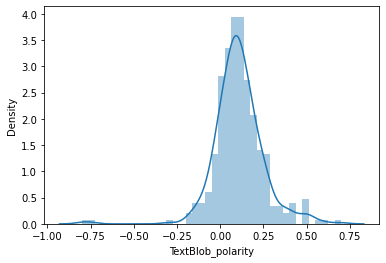

In [19]:
sns.distplot(df_new['TextBlob_polarity'])  
# From the graph we can see that most of the reviews are positive (Polarity greater than 0)

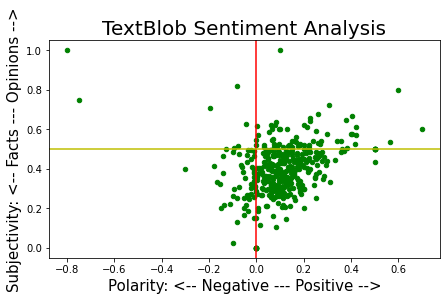

In [20]:
# Plot the results


df_new.plot.scatter(x ='TextBlob_polarity', y ='TextBlob_subjectivity', color = 'green', figsize =[7, 4])    
plt.title('TextBlob Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity: <-- Negative --- Positive -->', fontsize=15)
plt.ylabel('Subjectivity: <-- Facts --- Opinions -->', fontsize=15)
plt.axvline(0.0, color = 'r')
plt.axhline(0.5, color = 'y')
    
plt.show()

In [21]:
## The graph above shows tha the reviews are more based of facts(subjectivity<0.5) than opinions(subjectivity>0.5) and that they are mostly positive.
## Having more reviews based on facts is good as we are working on scientific papers, reviewed by esperts. 

In [22]:
def TextBlob_score(text):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity < -0.6:
            return "-2"
        elif analysis.sentiment.polarity >= -0.6 and analysis.sentiment.polarity <= -0.0000001:
            return "-1"
        elif analysis.sentiment.polarity > -0.0000001 and analysis.sentiment.polarity <= 0.6:
            return "1" 
        elif analysis.sentiment.polarity> 0.6:
            return "2"
        else:
            return '0'

In [23]:
# # Label the reviews using Vader

df_new["TextBlob_score"] = df_new["Lemma_clean_eng_text"].apply(lambda x :TextBlob_score(x))
df_new.tail()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score,TextBlob_polarity,TextBlob_subjectivity,TextBlob_sentiment,TextBlob_score
394,169,-1,-2,work aim provide vision use eva tool different...,0.9081,very positive,2,0.092803,0.469621,positive,1
395,169,-1,-1,paper well written easy read conforms format e...,0.4767,positive,1,-0.002083,0.547917,negative,-1
396,170,-1,0,background observation example implementation ...,0.4588,positive,1,0.112500,0.312500,positive,1
397,170,1,-1,process making state machine arduous device pr...,-0.3612,negative,-1,-0.040278,0.434722,negative,-1
398,171,1,-1,article basically describes component hovercra...,-0.0258,negative,-1,0.070000,0.163333,positive,1


In [24]:
df_new.head()

,level_0,evaluation,orientation,Lemma_clean_eng_text,Vader_Compound,Vader_sentiment,Vader_score,TextBlob_polarity,TextBlob_subjectivity,TextBlob_sentiment,TextBlob_score
0,0,1,0,article address relevant contingent problem in...,0.9657,very positive,2,0.421429,0.612338,positive,1
1,0,1,1,article present practical recommendation devel...,0.9062,very positive,2,0.383333,0.504167,positive,1
2,0,1,1,theme interesting much help guide incorporate ...,0.9231,very positive,2,0.142857,0.325000,positive,1
3,1,2,1,ict use experience academic collaboration expl...,0.8920,positive,1,0.069231,0.468590,positive,1
4,1,2,0,author describe methodology developing collabo...,0.9768,very positive,2,0.035840,0.462970,positive,1


In [25]:
### Save the dataframe for later used it to build the models.

# Delect the CSV file

# I'm doing this, because it can happened that I run my notebook many times, and I will like to have a last version of my CSV file each time.
if os.path.exists("englishSentimentDF.csv"):
    os.remove("englishSentimentDF.csv")
else:
    print("The file does not exist")

In [26]:
df_new.to_csv('englishSentimentDF.csv')

In [27]:
# df_new.TextBlob_score.value_counts().plot(kind="bar")
# plt.show()

In [28]:
# df_new.Vader_score.value_counts().plot(kind="bar")
# plt.show()

    evaluation
 2         106
-2          86
 1          86
 0          62
-1          59


<AxesSubplot:>

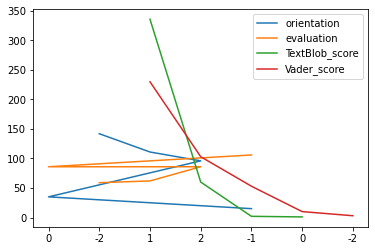

In [29]:
a = pd.DataFrame(df_new['orientation'].value_counts())
b = pd.DataFrame(df_new['evaluation'].value_counts())
c = pd.DataFrame(df_new['TextBlob_score'].value_counts())
d = pd.DataFrame(df_new['Vader_score'].value_counts())
print(b)

ax = a.plot()
b.plot(ax=ax)
c.plot(ax=ax)
d.plot(ax=ax)


In [30]:
dfs = [a,b,c,d]
nan_value = 0
# solution 1 (fast)
result_1 = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
result_1

,orientation,evaluation,TextBlob_score,Vader_score
-2,35.0,86.0,0.0,0.0
-1,142.0,59.0,0.0,0.0
0,111.0,62.0,0.0,0.0
1,96.0,86.0,0.0,0.0
2,15.0,106.0,0.0,0.0
-1,0.0,0.0,60.0,53.0
-2,0.0,0.0,2.0,3.0
0,0.0,0.0,0.0,10.0
1,0.0,0.0,336.0,230.0
2,0.0,0.0,1.0,103.0


In [31]:
result_1.index.names= ['Scores'] # Rename index
result_1.reset_index(inplace=True) # convert index into column

result_1


,Scores,orientation,evaluation,TextBlob_score,Vader_score
0,-2,35.0,86.0,0.0,0.0
1,-1,142.0,59.0,0.0,0.0
2,0,111.0,62.0,0.0,0.0
3,1,96.0,86.0,0.0,0.0
4,2,15.0,106.0,0.0,0.0
5,-1,0.0,0.0,60.0,53.0
6,-2,0.0,0.0,2.0,3.0
7,0,0.0,0.0,0.0,10.0
8,1,0.0,0.0,336.0,230.0
9,2,0.0,0.0,1.0,103.0


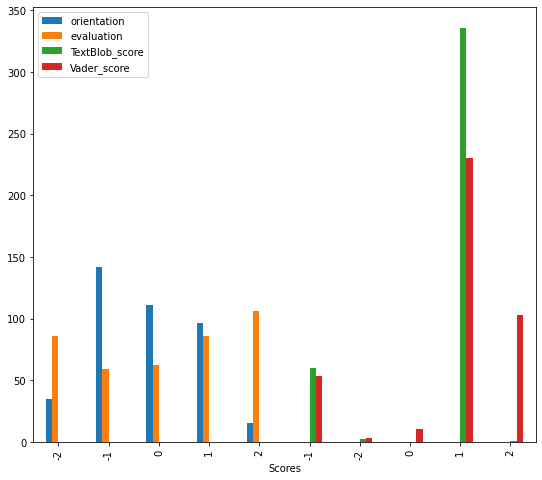

In [32]:
# plot the dataframe
result_1.plot(x="Scores", y=["orientation", "evaluation",  "TextBlob_score", "Vader_score"], kind="bar", figsize=(9, 8))

plt.show()
  